# STAT6289 Statistical Deep Learning Homework 3

We try to predict stock price of Tesla using LSTM model.

## 1. Load the data and inspect them

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv("TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


## 2. Split the data into training and test sets

Since there are 1328 observations in the dataset, the first 1000 observations in the dataset will be considered as the training dataset and the rest will be the test dataset.

In [3]:
training_set = df.iloc[:1000, 1:2].values
test_set = df.iloc[1000:, 1:2].values

## 3. Build the input features with different time lags

### (1) Input features with time window of 60

In [5]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(940, 60, 1)
print(X_train.shape)

### (2) Input festure with time window of 50

In [ ]:
# X_train = []
# y_train = []
# for i in range(60, 800):
#     X_train.append(training_set_scaled[i-50:i, 0])
#     y_train.append(training_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# X_test = []
# y_test = []
# for i in range(60, 519):
#     X_test.append(inputs[i-50:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


## 4. Build the LSTM model

### (1) The first LSTM model is the one with 50 neurons and 4 hidden layers. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [7]:
model1 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))

# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [8]:
# Fitting the RNN to the Training set
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 3s 92ms/step - loss: 0.0567
Epoch 2/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0159
Epoch 3/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0138
Epoch 4/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0170
Epoch 5/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0137
Epoch 6/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0118
Epoch 7/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0110
Epoch 8/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0109
Epoch 9/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0101
Epoch 10/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0107
Epoch 11/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0095
Epoch 12/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0088
Epoch 13/100
30/30 [=====

In order to predict future stock prices we need to do a couple of things after loading in the test set:

1. Merge the training set and the test set on the 0 axis.
2. Set the time step as 60 (as seen previously)
3. Use MinMaxScaler to transform the new dataset
4. Reshape the dataset as done previously

After making the predictions we use inverse_transform to get back the stock prices in normal readable format.

In [9]:

dataset_train = df.iloc[:1000, 1:2]
dataset_test = df.iloc[1000:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
# (388, 60, 1)

(388, 1)


In [10]:
X_test = []
for i in range(60, 388):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (328, 60, 1)

(328, 60, 1)


In [12]:
predicted_stock_price_1 = model1.predict(X_test)
predicted_stock_price_1 = sc.inverse_transform(predicted_stock_price_1)

Finally, we use Matplotlib to visualize the result of the predicted stock price and the real stock price.

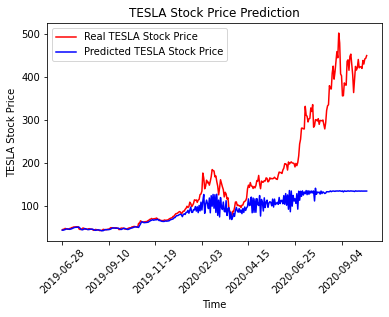

In [16]:
# Visualising the results
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = "Real TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_1, color = 'blue', label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,328,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### (2) The second LSTM model is the one with 50 neurons and 6 hidden layers. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [18]:
model2 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))

# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Fitting the RNN to the Training set
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0704
Epoch 2/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0193
Epoch 3/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0168
Epoch 4/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0171
Epoch 5/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0156
Epoch 6/100
30/30 [==============================] - 5s 160ms/step - loss: 0.0155
Epoch 7/100
30/30 [==============================] - 5s 158ms/step - loss: 0.0144
Epoch 8/100
30/30 [==============================] - 5s 158ms/step - loss: 0.0138
Epoch 9/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0123
Epoch 10/100
30/30 [==============================] - 5s 157ms/step - loss: 0.0126
Epoch 11/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0123
Epoch 12/100
30/30 [==============================] - 5s 159ms/step - loss: 0.0116
Epoch 13/100


In [20]:
# Make predictions
predicted_stock_price_2 = model2.predict(X_test)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

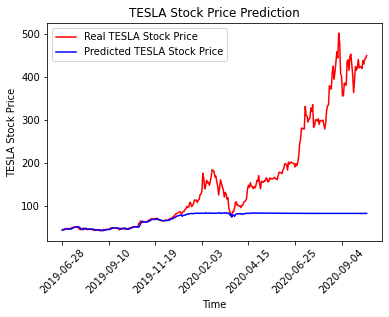

In [22]:
# Visualising the results
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = "Real TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_2, color = 'blue', label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,328,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### (3) The third LSTM model is the one with 50 neurons and 4 hidden layers, where each hidden layer has a dropout rate of 0.5. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [24]:
model3 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model3.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.5))

# Adding a third LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.5))

# Adding a fourth LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50))
model3.add(Dropout(0.5))

# Adding the output layer
model3.add(Dense(units = 1))

# Compiling the RNN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
# Fitting the RNN to the Training set
model3.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 3s 93ms/step - loss: 0.0617
Epoch 2/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0245
Epoch 3/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0227
Epoch 4/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0211
Epoch 5/100
30/30 [==============================] - 3s 101ms/step - loss: 0.0197
Epoch 6/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0205
Epoch 7/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0167
Epoch 8/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0164
Epoch 9/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0167
Epoch 10/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0162
Epoch 11/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0140
Epoch 12/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0150
Epoch 13/100
30/30 [====

In [29]:
predicted_stock_price_3 = model3.predict(X_test)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)

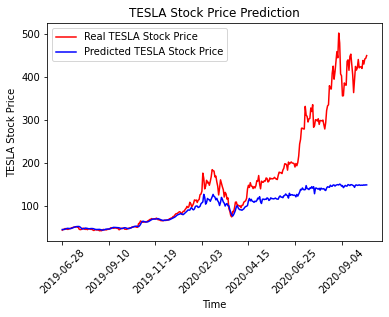

In [30]:
# Visualising the results
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = "Real TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_3, color = 'blue', label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,328,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### (4) The third LSTM model is the one with 128 neurons and 4 hidden layers, where each hidden layer has a dropout rate of 0.5. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [32]:
model4 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model4.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 128, return_sequences = True))
model4.add(Dropout(0.5))

# Adding a third LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 128, return_sequences = True))
model4.add(Dropout(0.5))

# Adding a fourth LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 128))
model4.add(Dropout(0.5))

# Adding the output layer
model4.add(Dense(units = 1))

# Compiling the RNN
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
# Fitting the RNN to the Training set
model4.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 8s 256ms/step - loss: 0.0498
Epoch 2/100
30/30 [==============================] - 8s 260ms/step - loss: 0.0176
Epoch 3/100
30/30 [==============================] - 8s 261ms/step - loss: 0.0149
Epoch 4/100
30/30 [==============================] - 8s 261ms/step - loss: 0.0134
Epoch 5/100
30/30 [==============================] - 8s 261ms/step - loss: 0.0132
Epoch 6/100
30/30 [==============================] - 8s 259ms/step - loss: 0.0127
Epoch 7/100
30/30 [==============================] - 8s 256ms/step - loss: 0.0118
Epoch 8/100
30/30 [==============================] - 8s 258ms/step - loss: 0.0116
Epoch 9/100
30/30 [==============================] - 8s 255ms/step - loss: 0.0115
Epoch 10/100
30/30 [==============================] - 7s 242ms/step - loss: 0.0120
Epoch 11/100
30/30 [==============================] - 7s 244ms/step - loss: 0.0092
Epoch 12/100
30/30 [==============================] - 7s 245ms/step - loss: 0.0093
Epoch 13/100


In [34]:
predicted_stock_price_4 = model4.predict(X_test)
predicted_stock_price_4 = sc.inverse_transform(predicted_stock_price_4)

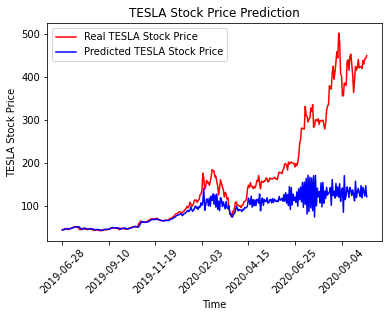

In [35]:
# Visualising the results
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = "Real TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_4, color = 'blue', label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,328,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

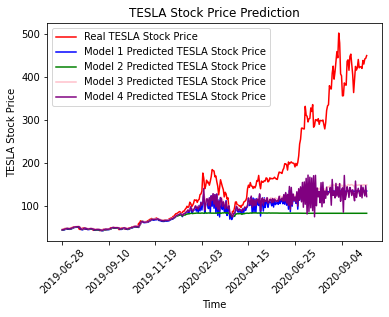

In [36]:
# Visualising the results
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = "Real TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_1, color = 'blue', label = "Model 1 Predicted TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_2, color = 'green', label = "Model 2 Predicted TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_3, color = 'pink', label = "Model 3 Predicted TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_4, color = 'purple', label = "Model 4 Predicted TESLA Stock Price")
plt.xticks(np.arange(0,328,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### **Conclusion**
1. Compare model 2 with model 1, increasing hidden layers from 4 to 6 in this case, casues the accuracy in test set to decrease, which mainly dues to the overfitting in training the model.

2. Compare model 3 with model 1, increaing dropout rate from 0.2 to 0.5 in each hidden layer of the model causes the accuracy in test set to increase. The effect of a higher dropout rate is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.

3. Compare model 4 with model 3, increasing number of neurons in each hidden layer from 50 to 128 causes the accuracy in test set to decrease, since using too many neurons in the hidden layers can result in overfitting. Another problem is that if the number of neurons is too large, the amount of training time can increase to the point that it is impossible to adequately train the neural network.

## Make predictions for the future two weeks

From above, we choose the model with 4 hidden layers and 50 nuerons in each hidden layer with a dropout rate of 0.5. We use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [38]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))

# Adding the output layer
model.add(Dense(units = 10)) # 10 is the number of stock prices fro the future two weeks

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 3s 92ms/step - loss: 0.1270
Epoch 2/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0520
Epoch 3/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0419
Epoch 4/100
30/30 [==============================] - 3s 98ms/step - loss: 0.0378
Epoch 5/100
30/30 [==============================] - 3s 101ms/step - loss: 0.0349
Epoch 6/100
30/30 [==============================] - 3s 105ms/step - loss: 0.0290
Epoch 7/100
30/30 [==============================] - 3s 106ms/step - loss: 0.0263
Epoch 8/100
30/30 [==============================] - 3s 100ms/step - loss: 0.0250
Epoch 9/100
30/30 [==============================] - 3s 95ms/step - loss: 0.0225
Epoch 10/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0214
Epoch 11/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0196
Epoch 12/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0185
Epoch 13/100
30/30 [=

In [45]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [46]:
print(predicted_stock_price.shape)

(328, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


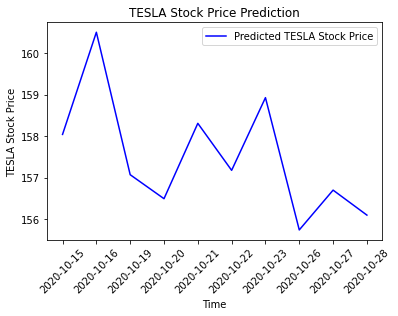

In [59]:
predicted_future_two_weeks = predicted_stock_price[-1, :]
myDates = ['2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28']
df.predicted = pd.DataFrame({"Date": myDates, "Predicted_Stock_Price": predicted_future_two_weeks})
# Visualising the results
plt.plot(df.predicted['Date'], predicted_future_two_weeks, color = 'blue', label = "Predicted TESLA Stock Price")
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(myDates, rotation=45)
plt.legend()
plt.show()